# Dask Runner Tool usage with Local ClientPlug and LocalFiles DataPlug
This example demonstrates the use of Local ClientPlug and LocalFiles DataPlug with the SolarDataTools Runner Class. in this demonstration we will cover the basic usage of the Runner tool and visualize the task graph generated by `Runner.set_up()`. We will then compute the task graph using the Dask LocalClient Class and view the generated results DataFrame.

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import glob, os
from sdt_dask.dask_tool.runner import Runner

In [13]:
from sdt_dask.dataplugs.csv_plug import LocalFiles
LocalFiles?

Init signature: LocalFiles(path_to_files, ext='.csv')
Docstring:     
Dataplug class for retrieving data from some source. It's recommended
that user-created dataplug inherit from this class to ensure compatibility.

The initialization argument for each class will be different depending on
the source. The main requirement is to keep the ``Dataplug.get_data`` method,
and make sure the args and returns as defined here.
File:           ~/Documents/GitHub/solar-data-tools/sdt_dask/dataplugs/csv_plug.py
Type:           type
Subclasses:     

The LocalFiles DataPlug requires the directory path to the CSV files. Here we add a key `NotExist` to demonstrate error handling for the Runner tool.

In [14]:
path = "./example_data/"
LocalFiles_DataPlug = LocalFiles(path_to_files=path)
KEYS = [(os.path.basename(fname)[:-4],) for fname in glob.glob(path + "*")]
KEYS.append(('NotExist',))
KEYS

[('ZT162185000441C1203',), ('TAEFC1044741',), ('NotExist',)]

In [15]:
LocalFiles_DataPlug.get_data(KEYS[0])

,ac_power_01
ts,
2018-11-07 15:15:00,7.1087
2018-11-07 15:20:00,6.6980
2018-11-07 15:25:00,6.1362
2018-11-07 15:30:00,5.6203
2018-11-07 15:35:00,5.0581
...,...
2019-06-20 15:25:00,5.0830
2019-06-20 15:30:00,5.1166
2019-06-20 15:35:00,5.3633


### Set a local User-defined Client
The LocalClient Class uses Dask Clusters to spawn a Local Client to perform dataset computations. The LocalClient Class requires arguments to define the number of workers, threads allocated to each worker and the amount memory utilized by each worker in the Client. 

**When assigning resource values to the workers it necessary to keep in mind the total resources available on the system spawning the client. This includes the total number of cores (for number of workers) present on the system, total threads and total memory.**

**The memory amount specified is in GiB. The memory allocated to each worker shouldn't exceed the total system memory (RAM).**

In [16]:
from sdt_dask.clients.local_client import LocalClient

In [17]:
client_setup = LocalClient(workers=3, threads=1, memory=6)
local_client = client_setup.init_client()
local_client.dashboard_link
local_client


Dask Dashboard Link: http://127.0.0.1:8787/status



Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 3
Total threads: 3,Total memory: 18.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35579,Workers: 3
Dashboard: http://127.0.0.1:8787/status,Total threads: 3
Started: Just now,Total memory: 18.00 GiB
Comm: tcp://127.0.0.1:42639,Total threads: 1
Dashboard: http://127.0.0.1:33327/status,Memory: 6.00 GiB
Nanny: tcp://127.0.0.1:45335,


### Configuring the Runner Tool
The Runner tool initialization requires the Client Object. The DataPlug object is passed to the `Runner.set_up()` to retrieve the dataset associated with the key combinations. In this case the keys will be the CSV filenames present in the directory path when initializing the LocalFiles DataPlug earlier. 

We can visualize the generated task graph using Dask's visualize method.

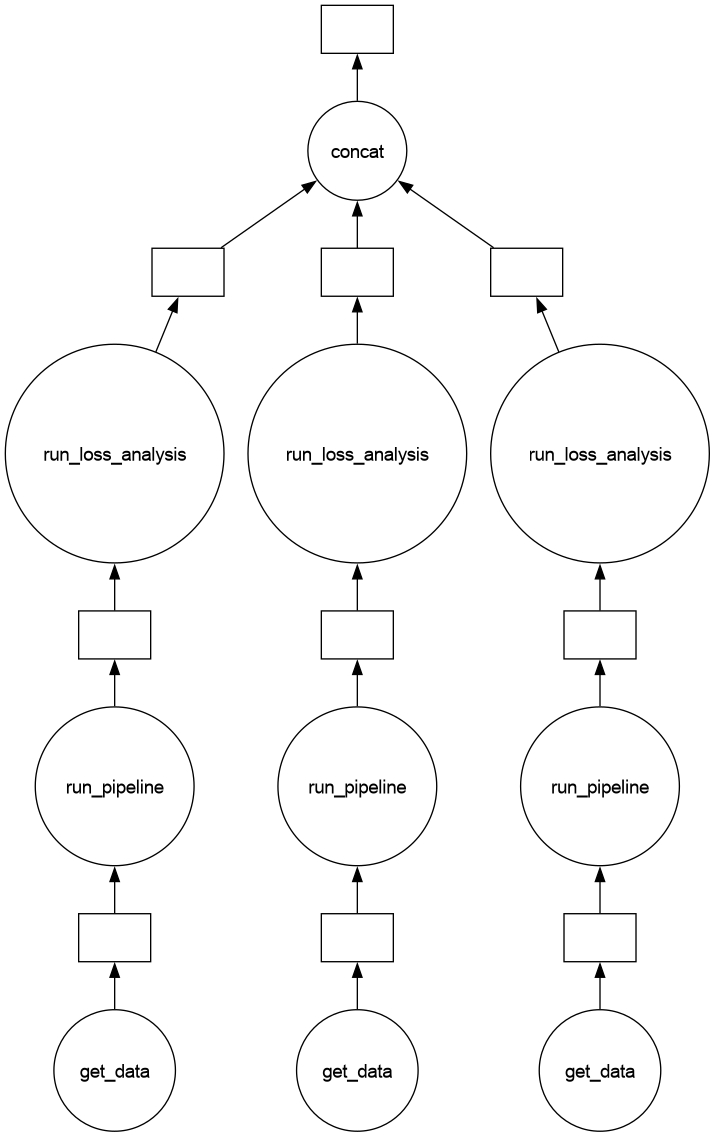

In [18]:
dask_tool = Runner(local_client)
dask_tool = dask_tool.set_up(KEYS, LocalFiles_DataPlug, fix_shifts=True, verbose=True)

# viewing the task graph using Dask's visualize function
dask_tool.visualize()

Users can compute the task graph using `Runner.compute()` function and if required can also generate a performance report to view and analyze the compute time and task graphs. For this demo we don't generate the performance report.

*Note: If the directory path specified doesn't exist a new directory will be created.*

In [19]:
%%time
# Compute without performance report
df = dask_tool.compute(report=False)

# Compute with performance report
# df = dask_tool.compute(report=True, 
#                        output_path='../results/', 
#                        dask_report='dask_report', 
#                        summary_report='summary_report')

df

2024-06-12 17:26:19,494 - distributed.worker.memory - WARNING - Worker is at 101% memory usage. Pausing worker.  Process memory: 6.10 GiB -- Worker memory limit: 6.00 GiB
2024-06-12 17:26:19,570 - distributed.worker.memory - WARNING - Worker is at 6% memory usage. Resuming worker. Process memory: 417.53 MiB -- Worker memory limit: 6.00 GiB
2024-06-12 17:26:19,712 - distributed.worker.memory - WARNING - Worker is at 100% memory usage. Pausing worker.  Process memory: 6.02 GiB -- Worker memory limit: 6.00 GiB
2024-06-12 17:26:19,898 - distributed.worker.memory - WARNING - Worker is at 6% memory usage. Resuming worker. Process memory: 411.46 MiB -- Worker memory limit: 6.00 GiB



            ************************************************
            * Solar Data Tools Degradation Estimation Tool *
            ************************************************

            Monte Carlo sampling to generate a distributional estimate
            of the degradation rate [%/yr]

            The distribution typically stabilizes in 50-100 samples.

            Author: Bennet Meyers, SLAC

            This material is based upon work supported by the U.S. Department
            of Energy's Office of Energy Efficiency and Renewable Energy (EERE)
            under the Solar Energy Technologies Office Award Number 38529.

            


11it [00:01,  5.86it/s]

P50, P02.5, P97.5: -397.603, -71872.722, 96.448
changes: -2.300e+02, 0.000e+00, 0.000e+00


21it [00:03,  5.85it/s]

P50, P02.5, P97.5: -759.804, -2239526.089, 96.448
changes: 7.708e+02, 0.000e+00, 0.000e+00


31it [00:05,  5.79it/s]

P50, P02.5, P97.5: -2875.452, -32144410.149, 96.307
changes: -3.949e+01, 2.207e+05, -5.295e-02


41it [00:06,  5.52it/s]

P50, P02.5, P97.5: -2796.473, -29400721.489, 95.778
changes: -2.476e+02, 3.374e+05, -5.295e-02


51it [00:08,  5.86it/s]

P50, P02.5, P97.5: -2875.452, -26026354.561, 95.248
changes: -3.949e+01, 3.374e+05, -5.295e-02


61it [00:10,  5.99it/s]

P50, P02.5, P97.5: -2875.452, -22651987.634, 94.719
changes: -3.949e+01, 3.374e+05, -5.295e-02


71it [00:11,  6.09it/s]

P50, P02.5, P97.5: -2796.473, -32775088.416, 92.650
changes: 3.949e+01, 3.374e+05, -6.300e-01


81it [00:13,  6.04it/s]

P50, P02.5, P97.5: -2301.325, -29400721.489, 95.367
changes: 1.659e+02, 3.374e+05, -3.792e-02


91it [00:15,  5.70it/s]

P50, P02.5, P97.5: -2301.325, -26026354.561, 96.108
changes: -4.080e+02, 3.374e+05, -1.504e-02


100it [00:17,  5.37it/s]

P50, P02.5, P97.5: -2875.452, -22651987.634, 95.957
changes: -3.949e+01, 3.374e+05, -1.504e-02


111it [00:18,  5.52it/s]

P50, P02.5, P97.5: -2796.473, -19701762.413, 96.408
changes: 3.949e+01, 1.784e+05, -1.504e-02


121it [00:20,  6.07it/s]

P50, P02.5, P97.5: -2301.325, -17917926.886, 96.258
changes: 1.148e+02, 1.784e+05, -1.504e-02


131it [00:22,  6.01it/s]

P50, P02.5, P97.5: -2301.325, -26026354.561, 96.108
changes: 1.148e+02, 3.374e+05, -1.504e-02


141it [00:23,  6.19it/s]

P50, P02.5, P97.5: -1743.209, -22651987.634, 95.957
changes: 1.697e+02, 3.374e+05, -1.504e-02


151it [00:25,  6.13it/s]

P50, P02.5, P97.5: -2301.325, -19701762.413, 95.746
changes: -1.094e+02, 1.784e+05, -3.792e-02


161it [00:27,  5.92it/s]

P50, P02.5, P97.5: -2700.934, -17917926.886, 95.367
changes: -3.392e+01, 1.784e+05, -3.792e-02


171it [00:28,  6.07it/s]

P50, P02.5, P97.5: -2700.934, -16134091.359, 94.988
changes: -3.392e+01, 1.784e+05, -3.792e-02


181it [00:30,  5.73it/s]

P50, P02.5, P97.5: -2796.473, -14350255.832, 94.608
changes: -3.666e+01, 1.784e+05, -3.792e-02


191it [00:32,  5.88it/s]

P50, P02.5, P97.5: -2796.473, -12887120.986, 94.073
changes: -1.898e+01, 5.812e+04, -9.634e-02


201it [00:34,  6.08it/s]

P50, P02.5, P97.5: -2818.484, -12305913.014, 93.110
changes: -1.101e+01, 5.812e+04, -9.634e-02


211it [00:35,  5.89it/s]

P50, P02.5, P97.5: -2723.154, -13911642.437, 92.147
changes: 1.768e+01, 5.017e+04, -9.634e-02


221it [00:37,  6.13it/s]

P50, P02.5, P97.5: -2700.934, -13409988.980, 91.183
changes: 1.111e+01, 5.017e+04, -9.634e-02


231it [00:38,  5.92it/s]

P50, P02.5, P97.5: -2385.729, -12887120.986, 94.073
changes: 7.262e+01, 5.812e+04, -9.634e-02


241it [00:40,  6.05it/s]

P50, P02.5, P97.5: -2530.973, -12305913.014, 93.110
changes: -7.262e+01, 5.812e+04, -9.634e-02


251it [00:42,  5.90it/s]

P50, P02.5, P97.5: -2758.517, -11724705.042, 92.147
changes: -1.768e+01, 5.812e+04, -9.634e-02


261it [00:43,  6.05it/s]

P50, P02.5, P97.5: -2733.884, -11143497.071, 91.183
changes: -5.365e+00, 5.812e+04, -9.634e-02


271it [00:45,  5.70it/s]

P50, P02.5, P97.5: -2758.517, -10594859.762, 90.431
changes: 1.898e+01, 4.591e+04, -1.706e-02


281it [00:47,  5.51it/s]

P50, P02.5, P97.5: -2733.884, -10135791.779, 93.110
changes: 1.232e+01, 4.591e+04, -9.634e-02


291it [00:49,  5.74it/s]

P50, P02.5, P97.5: -2723.154, -9676723.796, 92.147
changes: -1.111e+01, 4.591e+04, -9.634e-02


301it [00:50,  5.85it/s]

P50, P02.5, P97.5: -2796.473, -9217655.814, 91.183
changes: 1.101e+01, 4.591e+04, -9.634e-02


311it [00:52,  5.94it/s]

P50, P02.5, P97.5: -2818.484, -8750367.858, 90.431
changes: 2.848e+01, 4.899e+04, -1.706e-02


321it [00:54,  6.01it/s]

P50, P02.5, P97.5: -2875.452, -8260474.977, 90.261
changes: 1.580e+01, 4.899e+04, -1.706e-02


330it [00:56,  5.25it/s]

P50, P02.5, P97.5: -2907.053, -7770582.096, 91.914
changes: -1.580e+01, 4.899e+04, -8.290e-02


340it [00:57,  5.81it/s]

P50, P02.5, P97.5: -2907.053, -9217655.814, 91.085
changes: 2.463e+01, 4.591e+04, -8.290e-02


350it [00:59,  5.44it/s]

P50, P02.5, P97.5: -2907.053, -10594859.762, 90.431
changes: -1.580e+01, -1.796e+06, -1.706e-02


360it [01:01,  5.76it/s]

P50, P02.5, P97.5: -2956.306, -10135791.779, 90.261
changes: 1.693e+01, 4.591e+04, -1.706e-02


370it [01:03,  5.76it/s]

P50, P02.5, P97.5: -2956.306, -9676723.796, 90.090
changes: -2.463e+01, 4.591e+04, -1.706e-02


380it [01:04,  5.98it/s]

P50, P02.5, P97.5: -2875.452, -9217655.814, 89.919
changes: 1.580e+01, 4.591e+04, -1.706e-02


390it [01:06,  5.84it/s]

P50, P02.5, P97.5: -2875.452, -8750367.858, 89.079
changes: 1.580e+01, 4.899e+04, -2.683e-01


400it [01:08,  5.92it/s]

P50, P02.5, P97.5: -2818.484, -8260474.977, 86.396
changes: 2.848e+01, 4.899e+04, -2.683e-01


410it [01:09,  5.81it/s]

P50, P02.5, P97.5: -2875.452, -7770582.096, 83.713
changes: -2.848e+01, 4.899e+04, -2.683e-01


420it [01:11,  5.91it/s]

P50, P02.5, P97.5: -2875.452, -7280689.215, 81.031
changes: -2.848e+01, 4.899e+04, -2.683e-01


430it [01:13,  5.72it/s]

P50, P02.5, P97.5: -2818.484, -6790291.012, 89.079
changes: -1.101e+01, 4.918e+04, -2.683e-01


440it [01:14,  6.02it/s]

P50, P02.5, P97.5: -2875.452, -6298503.173, 86.396
changes: -2.848e+01, 4.918e+04, -2.683e-01


450it [01:16,  5.66it/s]

P50, P02.5, P97.5: -2907.029, -5806715.335, 90.090
changes: -1.579e+01, 4.918e+04, -1.706e-02


460it [01:18,  5.65it/s]

P50, P02.5, P97.5: -2818.484, -5314927.496, 89.919
changes: 2.848e+01, 4.918e+04, -1.706e-02


470it [01:20,  5.99it/s]

P50, P02.5, P97.5: -2796.473, -6790291.012, 89.787
changes: -1.898e+01, 4.918e+04, -2.879e-03


480it [01:21,  6.04it/s]

P50, P02.5, P97.5: -2733.884, -6298503.173, 89.758
changes: 1.232e+01, 4.918e+04, -2.879e-03


490it [01:23,  5.96it/s]

P50, P02.5, P97.5: -2686.495, -5806715.335, 90.090
changes: 7.220e+00, 4.918e+04, -1.706e-02


500it [01:25,  5.86it/s]

P50, P02.5, P97.5: -2613.098, -5314927.496, 89.919
changes: 1.000e+01, 4.918e+04, -1.706e-02


501it [01:25,  5.86it/s]


Performing loss factor analysis...

                    ***************************************
                    * Solar Data Tools Loss Factor Report *
                    ***************************************

                    degradation rate [%/yr]:                    -27252475742986.164
                    deg. rate 95% confidence:          [-5216569.928, 89.885]
                    total energy loss [kWh]:             -9342043038.5
                    bulk deg. energy loss (gain) [kWh]:  -5567380160.4
                    soiling energy loss [kWh]:              -3736443.8
                    capacity change energy loss [kWh]:        -61205.7
                    weather energy loss [kWh]:             -72033469.3
                    system outage loss [kWh]:            -3698831759.3
                    
CPU times: user 3.37 s, sys: 464 ms, total: 3.84 s
Wall time: 1min 34s


,key_field_0,get_data error,run_pipeline error,run_pipeline_report error,run_loss_analysis error,run_loss_analysis_report error,length,capacity,sampling,quality score,...,runtimes,degradation rate [%/yr],deg rate lower bound [%/yr],deg rate upper bound [%/yr],total energy loss [kWh],degradation energy loss [kWh],soiling energy loss [kWh],capacity change energy loss [kWh],weather energy loss [kWh],system outage loss [kWh]
0,ZT162185000441C1203,No error,No error,No error,The length of data is less than or equal to 1 ...,Loss analysis is not performed,0.619178,27.516420,5.0,0.973451,...,6.626265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,TAEFC1044741,No error,No error,No error,No error,No error,1.342466,4.941725,5.0,0.436735,...,6.706881,-2.725248e+13,-5.216570e+06,89.885349,-9.342043e+09,-5.567380e+09,-3.736444e+06,-61205.730557,-7.203347e+07,-3.698832e+09
0,NotExist,[Errno 2] No such file or directory: './exampl...,get_data error lead to nothing,get_data error lead to nothing,get_data error lead to nothing,get_data error lead to nothing,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


It is a good practice to shutdown the client when all computations and analysis are completed.

In [20]:
local_client.shutdown()